In [107]:
import pandas as pd
import numpy as np

df = pd.read_csv(f'outputs/output_res_20190610.csv')

In [108]:
df.columns

Index(['timestamp', 'price', 'side', 'quantity', 'action', 'bp0', 'bq0', 'bp1',
       'bq1', 'bp2', 'bq2', 'bp3', 'bq3', 'bp4', 'bq4', 'ap0', 'aq0', 'ap1',
       'aq1', 'ap2', 'aq2', 'ap3', 'aq3', 'ap4', 'aq4', 'ofi'],
      dtype='object')

In [109]:
df[['price', 'side', 'quantity', 'action', 'bp0', 'bq0', 'ap0', 'aq0','ofi']].head(20)

,price,side,quantity,action,bp0,bq0,ap0,aq0,ofi
0,9990,b,11,a,9990,11,NaN,NaN,11
1,9990,b,16,a,9990,27,NaN,NaN,16
2,9995,a,1,a,9990,27,9995.0,1.0,-1
3,9990,b,6,a,9990,33,9995.0,1.0,6
4,9990,b,1,a,9990,34,9995.0,1.0,1
5,9985,b,1,a,9990,34,9995.0,1.0,0
6,10000,a,1,a,9990,34,9995.0,1.0,0
7,9985,b,1,a,9990,34,9995.0,1.0,0
8,10000,a,1,a,9990,34,9995.0,1.0,-1
9,9985,b,1,a,9990,34,9995.0,1.0,0


In [112]:
df['ofi'].describe()

count    138813.000000
mean         -0.026518
std           9.771522
min        -125.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         240.000000
Name: ofi, dtype: float64

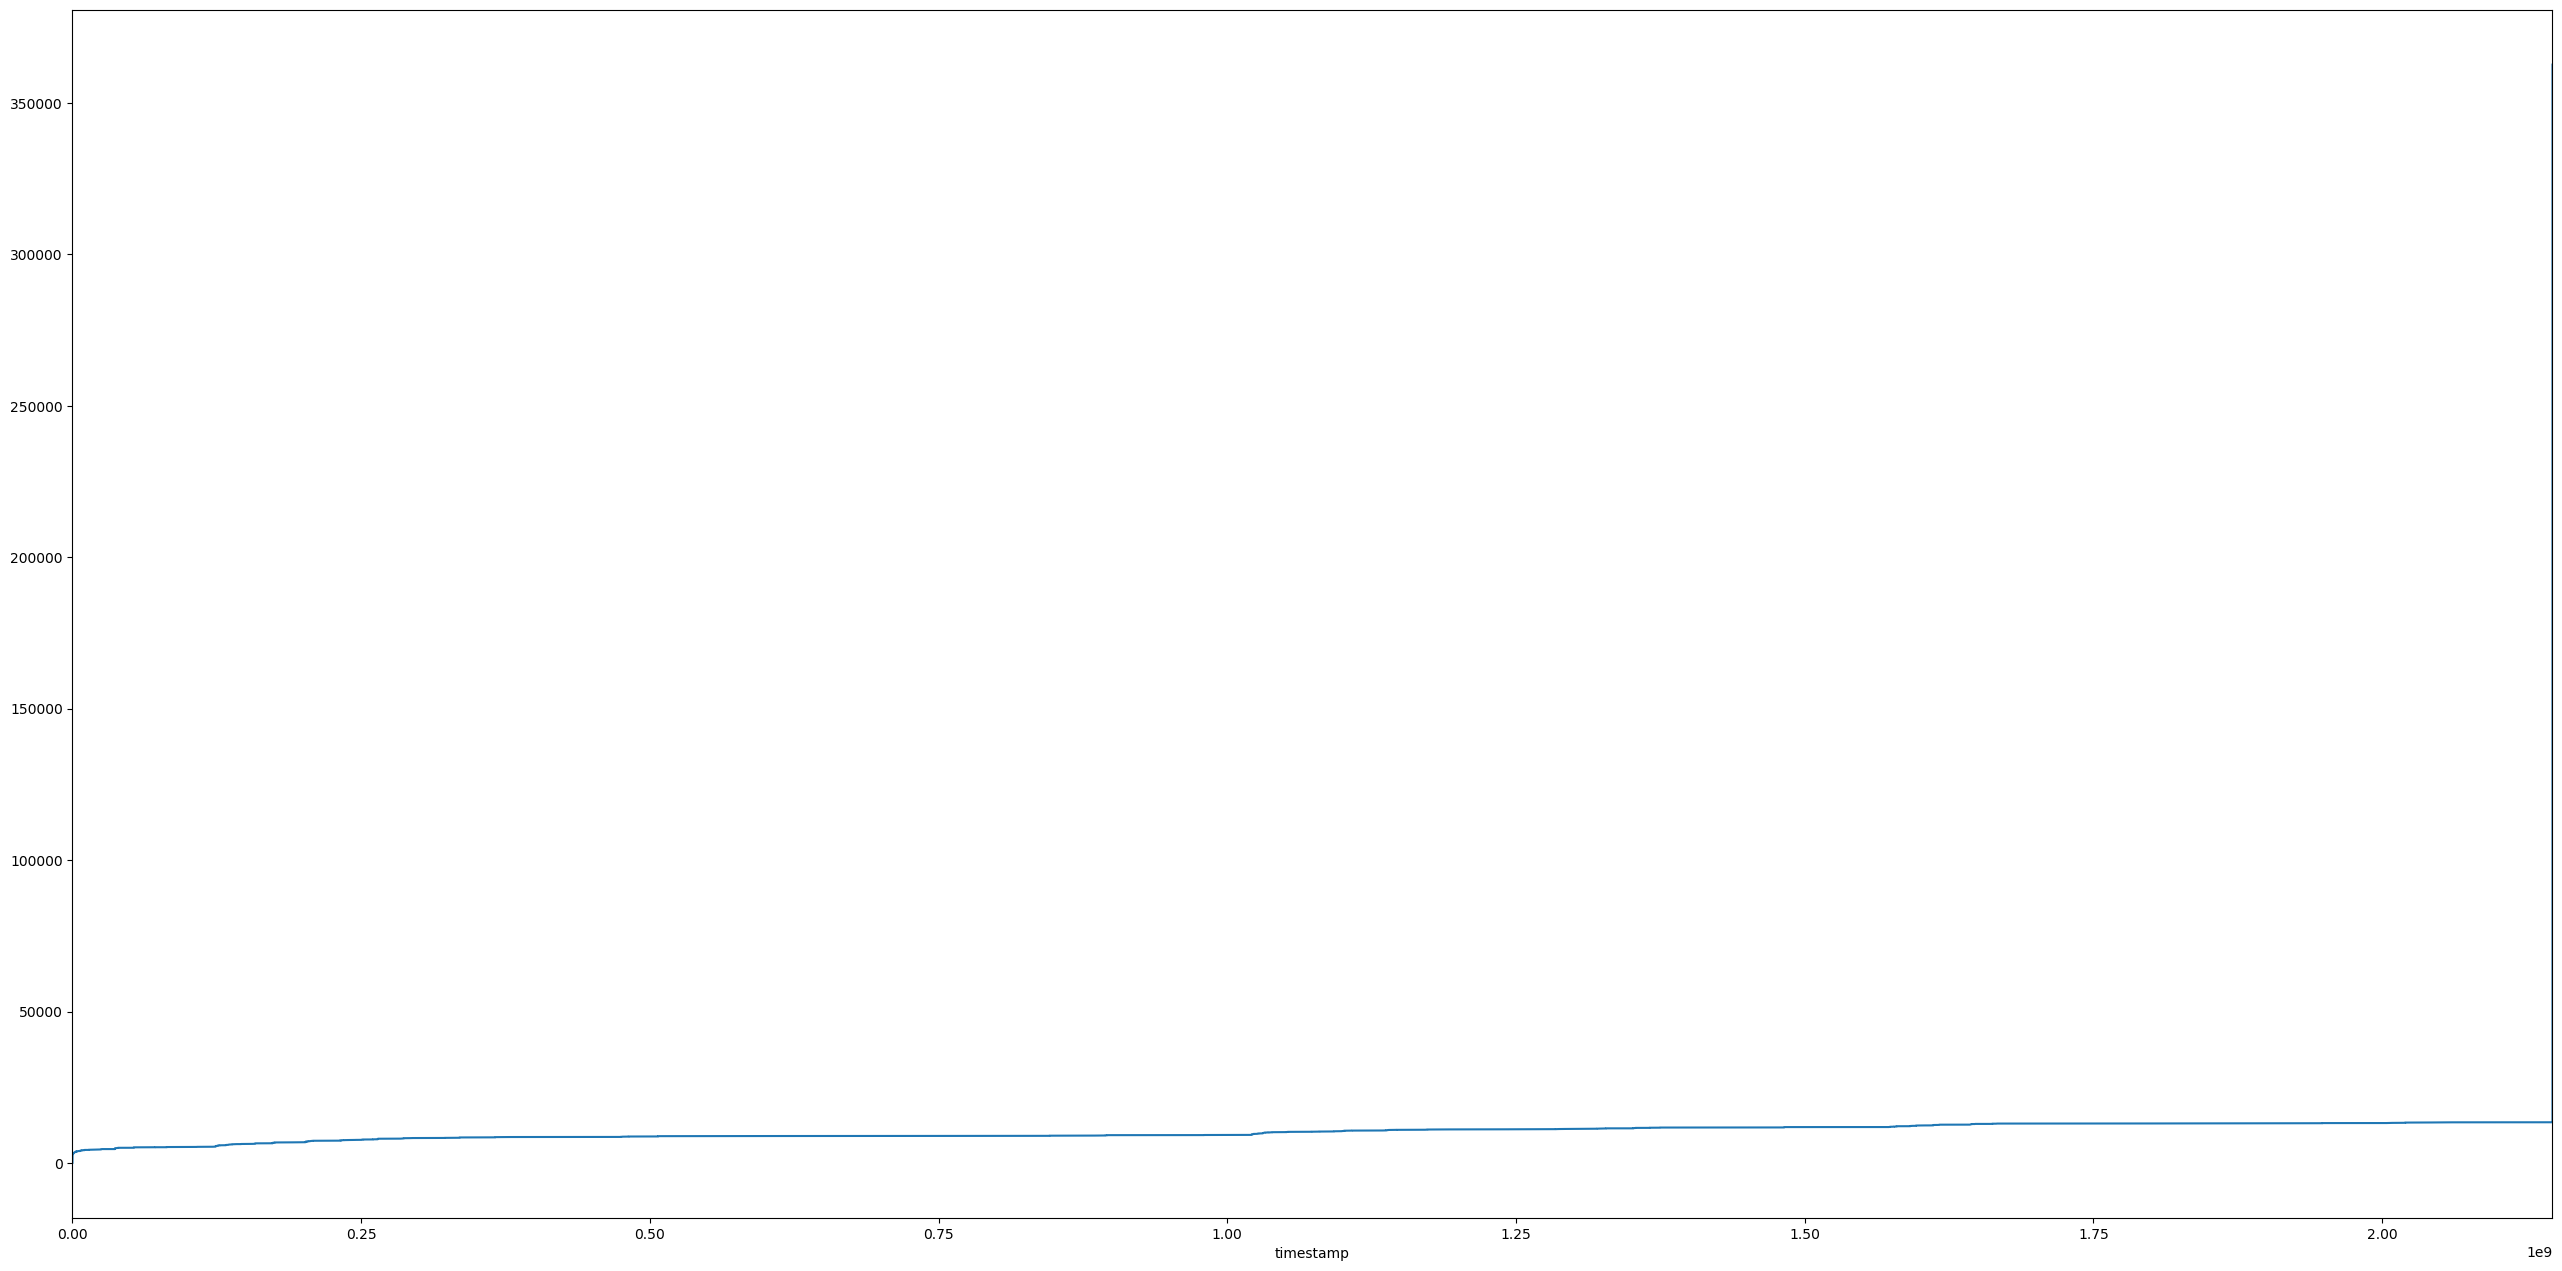

In [122]:
np.abs(df['ofi']).cumsum().plot()

In [113]:
dfs = []
for i in range(4):
    df = pd.read_csv(f'outputs/output_res_2019061{i}.csv', index_col='timestamp')
    dfs.append(df)

In [114]:
quantities = [df['quantity'].sum() for df in dfs]
quantities

[345951, 574523, 730994, 727386]

In [115]:
lengths = [(df.index[-1] - df.index[0]) * 1e-6 for df in dfs]
lengths

[2147.483647, 2147.483647, 2147.483647, 2147.483647]

In [116]:
ask_diffs = [df['ap0'].diff().fillna(0).unique() for df in dfs]
bid_diffs = [df['bp0'].diff().fillna(0).unique() for df in dfs]
print(ask_diffs)
print(bid_diffs)

[array([  0.,   5.,  -5., -10.,  10.]), array([  0.,  -5.,   5., -10.]), array([  0.,  -5.,   5., -10.]), array([  0., -15.,   5.,  -5., -10.,  10.])]
[array([ 0.,  5., -5., 10.]), array([ 0., -5.,  5.]), array([ 0., -5.,  5., 10.]), array([ 0., -5.,  5.])]


In [117]:
ask_diffs = [df['ap0'].diff().fillna(0) for df in dfs]
ask_diffs = [x[x != 0].shape[0] for x in ask_diffs]
ask_diffs = [lengths[i] / ask_diffs[i] for i in range(len(lengths))]
bid_diffs = [df['bp0'].diff().fillna(0) for df in dfs]
bid_diffs = [x[x != 0].shape[0] for x in bid_diffs]
bid_diffs = [lengths[i] / bid_diffs[i] for i in range(len(lengths))]
print(ask_diffs)
print(bid_diffs)

[1.643063234123948, 0.8109832503776435, 0.669623837542875, 0.6856588911238826]
[0.948535179770318, 0.8165337060836502, 0.6759470088133459, 0.6353501914201184]


In [118]:
[df['aq0'].mean() for df in dfs]

[24.788532609087177, 48.15029024682058, 50.452229299363054, 47.21140255684074]

In [119]:
[df['bq0'].mean() for df in dfs]

[43.48558132163414, 51.89983914351677, 50.70632233653632, 48.823602367042895]

In [120]:
return_period = 1000
sample_qty = 100

In [58]:
diff = df['ap0'].diff()

In [62]:
df['ap4'].max()

10145.0

In [54]:
df['ap0'].max()

10125

In [55]:
spread = df['ap0'] - df['bp0']

In [56]:
spread.describe()

count    264465.000000
mean          5.335111
std           1.252494
min           5.000000
25%           5.000000
50%           5.000000
75%           5.000000
max          20.000000
dtype: float64

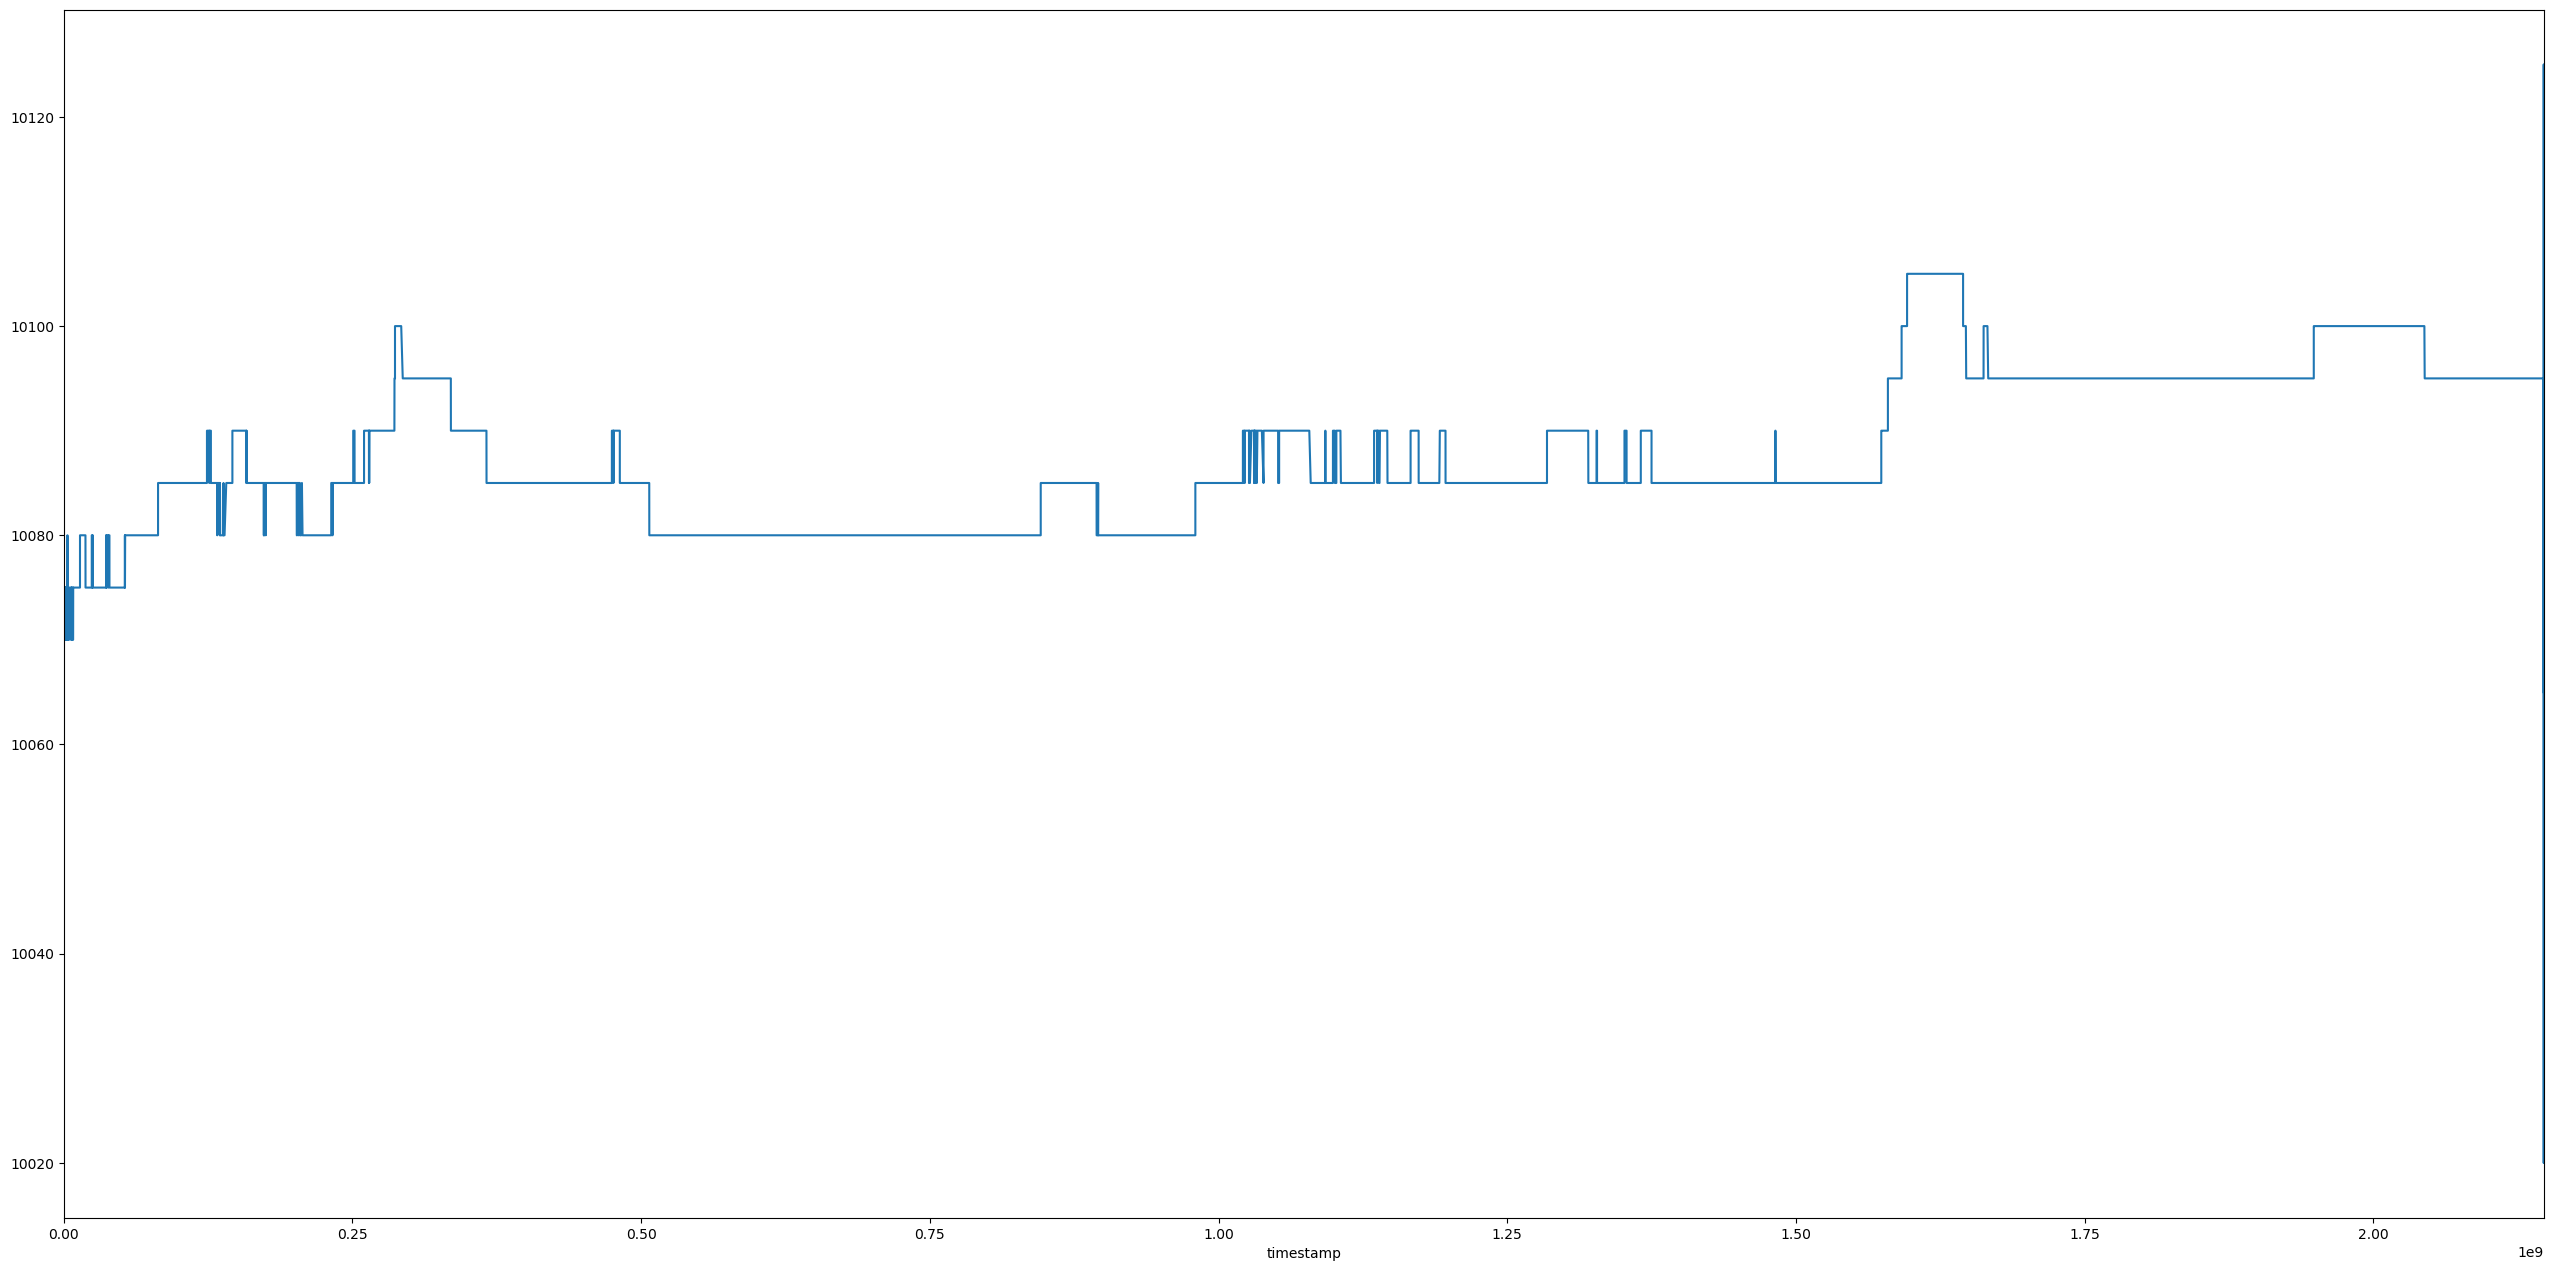

In [57]:
%matplotlib inline
df['ap0'].plot()

In [92]:
dfs[0]

,price,side,quantity,action,bp0,bq0,bp1,bq1,bp2,bq2,...,ap0,aq0,ap1,aq1,ap2,aq2,ap3,aq3,ap4,aq4
timestamp,,,,,,,,,,,,,,,,,,,,,
0,9990,b,11,a,9990,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,9990,b,16,a,9990,27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,9995,a,1,a,9990,27,NaN,NaN,NaN,NaN,...,9995.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,9990,b,6,a,9990,33,NaN,NaN,NaN,NaN,...,9995.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,9990,b,1,a,9990,34,NaN,NaN,NaN,NaN,...,9995.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147483647,10025,b,1,d,10025,14,10020.0,74.0,10015.0,75.0,...,10030.0,16.0,10035.0,103.0,10040.0,91.0,10045.0,59.0,10050.0,13.0
2147483647,10025,b,1,d,10025,13,10020.0,74.0,10015.0,75.0,...,10030.0,16.0,10035.0,103.0,10040.0,91.0,10045.0,59.0,10050.0,13.0
2147483647,10050,a,1,a,10025,13,10020.0,74.0,10015.0,75.0,...,10030.0,16.0,10035.0,103.0,10040.0,91.0,10045.0,59.0,10050.0,14.0


In [31]:
df['ap0'].iloc[-1000:]

timestamp
2147483647    10065
2147483647    10065
2147483647    10065
2147483647    10065
2147483647    10065
              ...  
2147483647    10065
2147483647    10065
2147483647    10065
2147483647    10065
2147483647    10065
Name: ap0, Length: 1000, dtype: int64

In [19]:
x = df['ap0']

In [20]:
(df.index[-1] - df.index[0]) * 1e-6

2147.483647

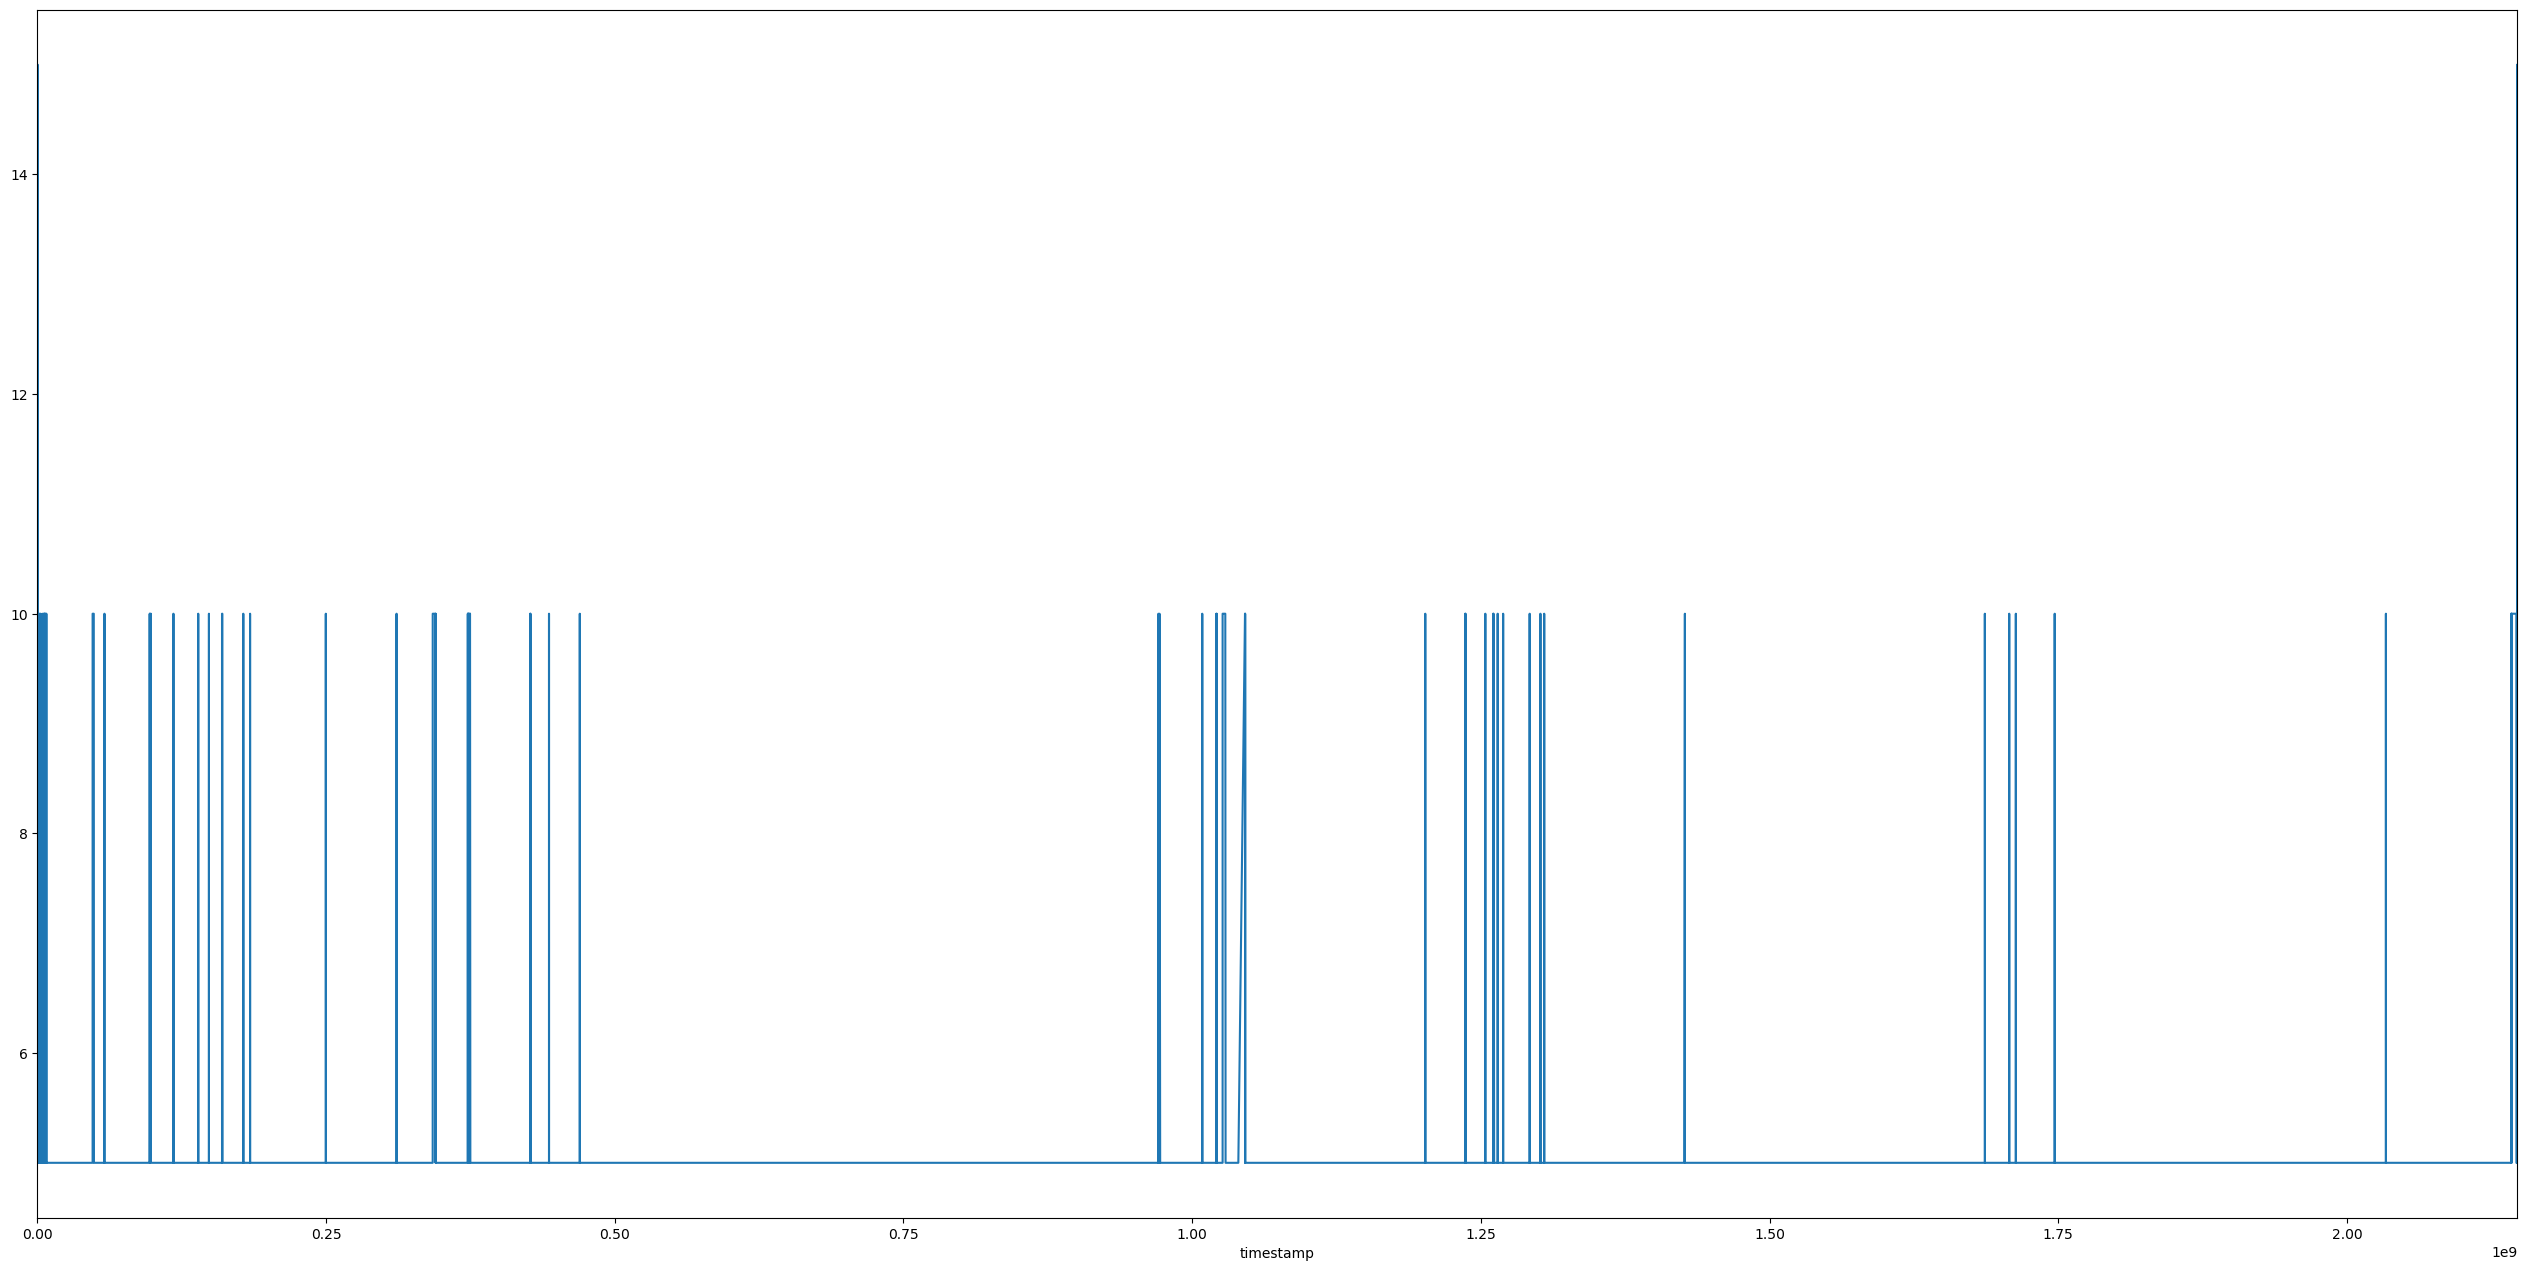

In [8]:
spread.plot()